In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [5]:
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X

array([[136897.8, 471784.1, 'New York'],
       [151377.59, 443898.53, 'California'],
       [101145.55, 407934.54, 'Florida'],
       [118671.85, 383199.62, 'New York'],
       [91391.77, 366168.42, 'Florida'],
       [99814.71, 362861.36, 'New York'],
       [147198.87, 127716.82, 'California'],
       [145530.06, 323876.68, 'Florida'],
       [148718.95, 311613.29, 'New York'],
       [108679.17, 304981.62, 'California'],
       [110594.11, 229160.95, 'Florida'],
       [91790.61, 249744.55, 'California'],
       [127320.38, 249839.44, 'Florida'],
       [135495.07, 252664.93, 'California'],
       [156547.42, 256512.92, 'Florida'],
       [122616.84, 261776.23, 'New York'],
       [121597.55, 264346.06, 'California'],
       [145077.58, 282574.31, 'New York'],
       [114175.79, 294919.57, 'Florida'],
       [153514.11, 0.0, 'New York'],
       [113867.3, 298664.47, 'California'],
       [153773.43, 299737.29, 'New York'],
       [122782.75, 303319.26, 'Florida'],
       [105751.03

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [9]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [10]:
X_test

array([[182645.56, 118148.2, 'Florida'],
       [91790.61, 249744.55, 'California'],
       [110594.11, 229160.95, 'Florida'],
       [84710.77, 164470.71, 'Florida'],
       [101145.55, 407934.54, 'Florida'],
       [127864.55, 353183.81, 'New York'],
       [65947.93, 185265.1, 'New York'],
       [152701.92, 88218.23, 'New York'],
       [122782.75, 303319.26, 'Florida'],
       [91391.77, 366168.42, 'Florida']], dtype=object)

In [11]:
X_train

array([[103057.49, 214634.81, 'Florida'],
       [85047.44, 205517.64, 'New York'],
       [144135.98, 134050.07, 'Florida'],
       [157693.92, 210797.67, 'California'],
       [114175.79, 294919.57, 'Florida'],
       [145530.06, 323876.68, 'Florida'],
       [156547.42, 256512.92, 'Florida'],
       [124153.04, 1903.93, 'New York'],
       [51743.15, 0.0, 'New York'],
       [153032.06, 107138.38, 'New York'],
       [122616.84, 261776.23, 'New York'],
       [115641.28, 91131.24, 'Florida'],
       [129219.61, 46085.25, 'California'],
       [121597.55, 264346.06, 'California'],
       [96189.63, 148001.11, 'California'],
       [113867.3, 298664.47, 'California'],
       [127382.3, 35534.17, 'New York'],
       [148718.95, 311613.29, 'New York'],
       [135495.07, 252664.93, 'California'],
       [139553.16, 137962.62, 'California'],
       [99814.71, 362861.36, 'New York'],
       [145077.58, 282574.31, 'New York'],
       [118546.05, 172795.67, 'California'],
       [116983.8, 

In [12]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""


'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [13]:
X_train

array([[103057.49, 214634.81, 'Florida'],
       [85047.44, 205517.64, 'New York'],
       [144135.98, 134050.07, 'Florida'],
       [157693.92, 210797.67, 'California'],
       [114175.79, 294919.57, 'Florida'],
       [145530.06, 323876.68, 'Florida'],
       [156547.42, 256512.92, 'Florida'],
       [124153.04, 1903.93, 'New York'],
       [51743.15, 0.0, 'New York'],
       [153032.06, 107138.38, 'New York'],
       [122616.84, 261776.23, 'New York'],
       [115641.28, 91131.24, 'Florida'],
       [129219.61, 46085.25, 'California'],
       [121597.55, 264346.06, 'California'],
       [96189.63, 148001.11, 'California'],
       [113867.3, 298664.47, 'California'],
       [127382.3, 35534.17, 'New York'],
       [148718.95, 311613.29, 'New York'],
       [135495.07, 252664.93, 'California'],
       [139553.16, 137962.62, 'California'],
       [99814.71, 362861.36, 'New York'],
       [145077.58, 282574.31, 'New York'],
       [118546.05, 172795.67, 'California'],
       [116983.8, 

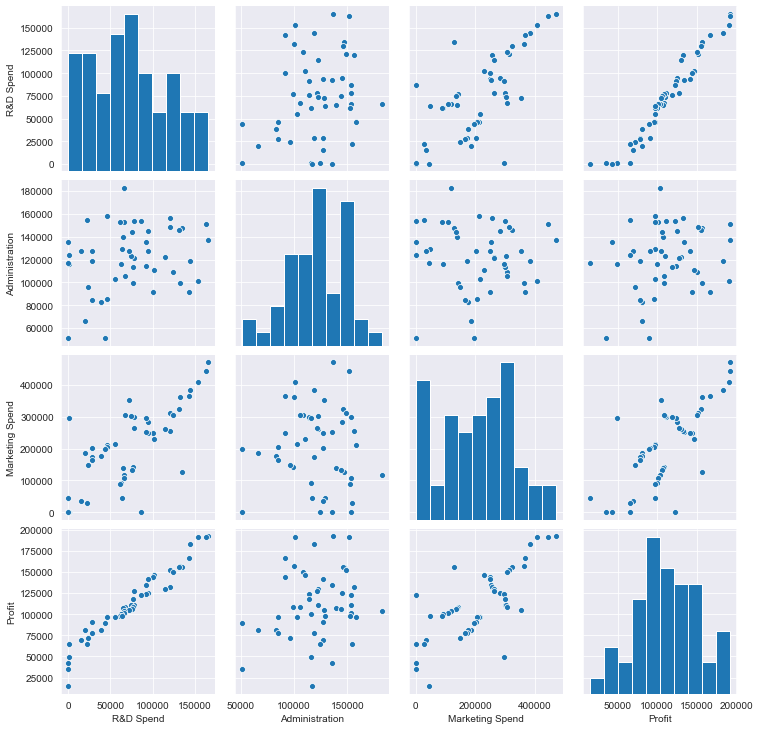

In [16]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(dataset)

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_X = LabelEncoder() 
X[:,2] = labelEncoder_X.fit_transform(X[ : , 2])
  

In [19]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float)

In [20]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3689780e+05,
        4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5137759e+05,
        4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1867185e+05,
        3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 9.9814710e+04,
        3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4719887e+05,
        1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4553006e+05,
        3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4871895e+05,
        3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0867917e+05,
        3.0498162e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.1059411e+05,
        2.29

In [21]:
X = X[:, 1:]

In [22]:
#Build model
import statsmodels.formula.api as smf 


In [24]:
#Building the optimal model using backward Elimination
import statsmodels.formula.api as sm
X=np.append(arr= np.ones((50, 1)).astype(int), values = X, axis=1)
X_opt = X[:, [0, 1, 2, 3, 4]]

In [25]:
X_opt

array([[1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.3689780e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.5137759e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.0114555e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.1867185e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        9.1391770e+04],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        9.9814710e+04],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.4719887e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.4553006e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.4871895e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0867917e+05],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.10

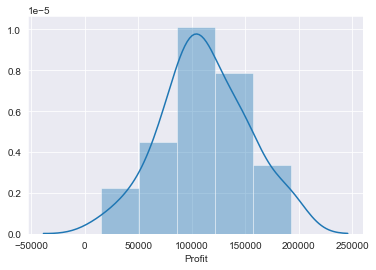

In [26]:
#Histgram on Profit
sns.distplot(dataset['Profit'],bins=5,kde=True)

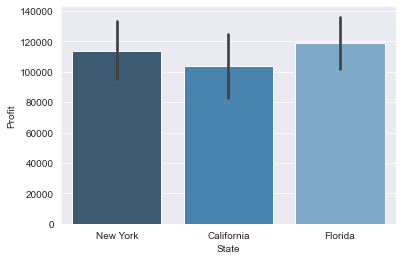

In [27]:
# profit split in State level - Looks Florida has the maximum Profit
sns.barplot(x='State',y='Profit',data=dataset, palette="Blues_d")
#sns.lineplot(x='State',y='Profit',data=dataset)

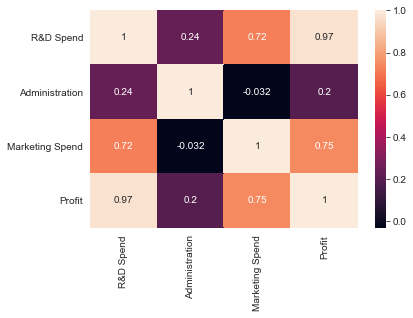

In [28]:
#gives positive & negative relation between categories
sns.heatmap(dataset.corr(), annot=True)

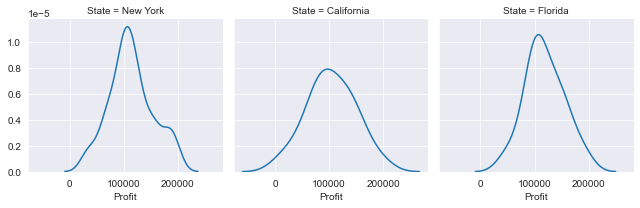

In [29]:
# spread of profit against state 
g=sns.FacetGrid(dataset, col='State')
g=g.map(sns.kdeplot,'Profit')


In [30]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [31]:
# Splitting the dataset into the Training set and Test set
import sklearn

#from sklearn import train_test_split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Coefficients: \n', regressor.coef_) 
regressor.score(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

Coefficients: 
 [ 0.00000000e+00 -6.21327023e+03  1.00243330e+04  4.31762672e-01
  2.41493372e-01]


In [35]:
print(regressor)

LinearRegression()


In [36]:
y_pred

array([106577.99626357, 105343.13679756, 102277.71300216,  75479.98875128,
       141370.81457944, 155922.74625969,  88638.20542032, 102659.16409976,
       125449.05313424, 127073.25530123])